In [1]:
# 📊 Overcooked PPO: Analisi e Confronto Training (Multi-run)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# ========== CONFIGURAZIONE ==========
# Inserisci qui i percorsi dei CSV delle run che vuoi confrontare.
# Puoi anche aggiungerli facilmente con un ciclo!

log_path = "/home/gabro/Desktop/AAS/final_project/overcooked_rl/cramped_room/logs/train_log_PPO_deep_shaping-decay-15000new_setup_15000.csv"
run_configs = [
    {
        "label": "Deep + Shaping + Decay",
        "path": log_path
    },
    # {
    #     "label": "Baseline + Shaping",
    #     "path": "cramped_room/logs/train_log_PPO_baseline_shaping-nodecay-12000exp1.csv"
    # },
    # Aggiungi altri run qui
    # {"label": "Nome Esperimento", "path": "percorso/al/file.csv"},
]



In [18]:
# ========== CARICA I CSV ==========
dataframes = []
for cfg in run_configs:
    if os.path.exists(cfg["path"]):
        df = pd.read_csv(cfg["path"])
        df["run_label"] = cfg["label"]
        dataframes.append(df)
    else:
        print(f"❌ File non trovato: {cfg['path']}")

if len(dataframes) == 0:
    print("Nessun file trovato, controlla i path!")
else:
    print(f"Caricati {len(dataframes)} run.")



Caricati 1 run.


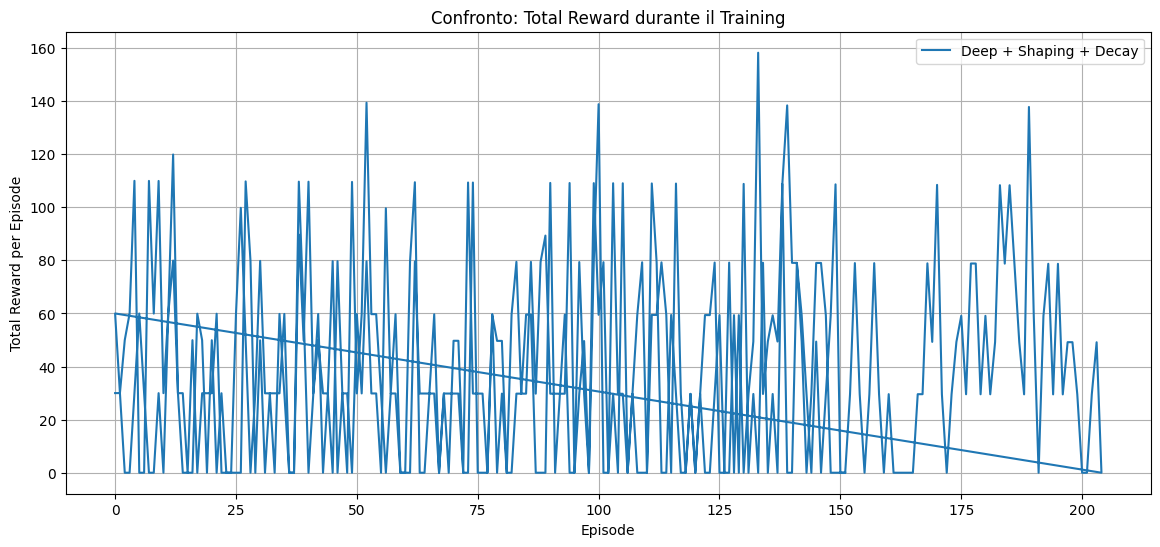

In [19]:
# ========== GRAFICO 1: Total Reward di episodio ==========
plt.figure(figsize=(14, 6))
for df in dataframes:
    plt.plot(df["episode"], df["total_reward"], label=df["run_label"].iloc[0])
plt.xlabel("Episode")
plt.ylabel("Total Reward per Episode")
plt.title("Confronto: Total Reward durante il Training")
plt.legend()
plt.grid(True)
plt.show()


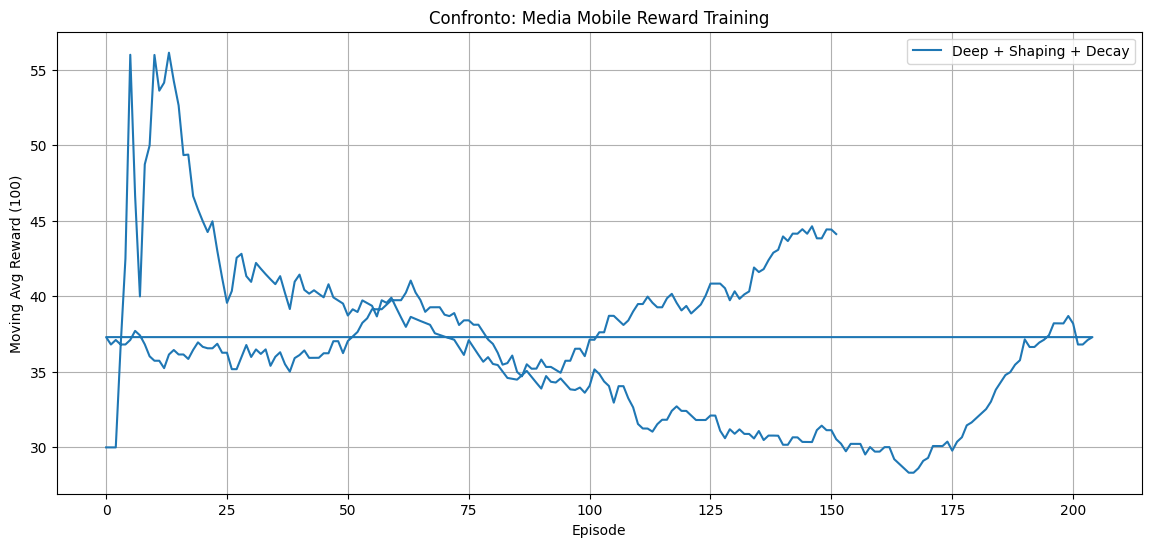

In [22]:
# ========== GRAFICO 2: Moving Avg Reward Training ==========
plt.figure(figsize=(14, 6))
for df in dataframes:
    if "moving_avg_train_reward" in df.columns:
        plt.plot(df["episode"], df["moving_avg_train_reward"], label=df["run_label"].iloc[0])
plt.xlabel("Episode")
plt.ylabel("Moving Avg Reward (100)")
plt.title("Confronto: Media Mobile Reward Training")
plt.legend()
plt.grid(True)
plt.show()


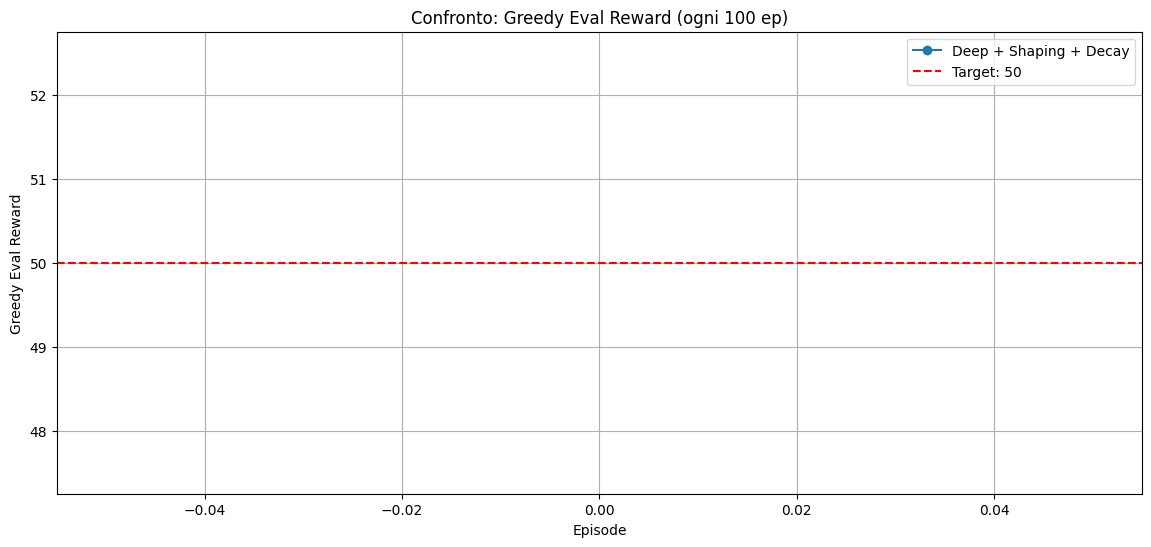

In [12]:
# ========== GRAFICO 3: Greedy Eval Reward ==========
plt.figure(figsize=(14, 6))
for df in dataframes:
    if "evaluation_reward_greedy" in df.columns:
        eval_episodes = df[df["evaluation_reward_greedy"] > 0]["episode"]
        eval_rewards = df[df["evaluation_reward_greedy"] > 0]["evaluation_reward_greedy"]
        plt.plot(eval_episodes, eval_rewards, marker="o", label=df["run_label"].iloc[0])
plt.axhline(50, color='red', linestyle='--', label="Target: 50")
plt.xlabel("Episode")
plt.ylabel("Greedy Eval Reward")
plt.title("Confronto: Greedy Eval Reward (ogni 100 ep)")
plt.legend()
plt.grid(True)
plt.show()


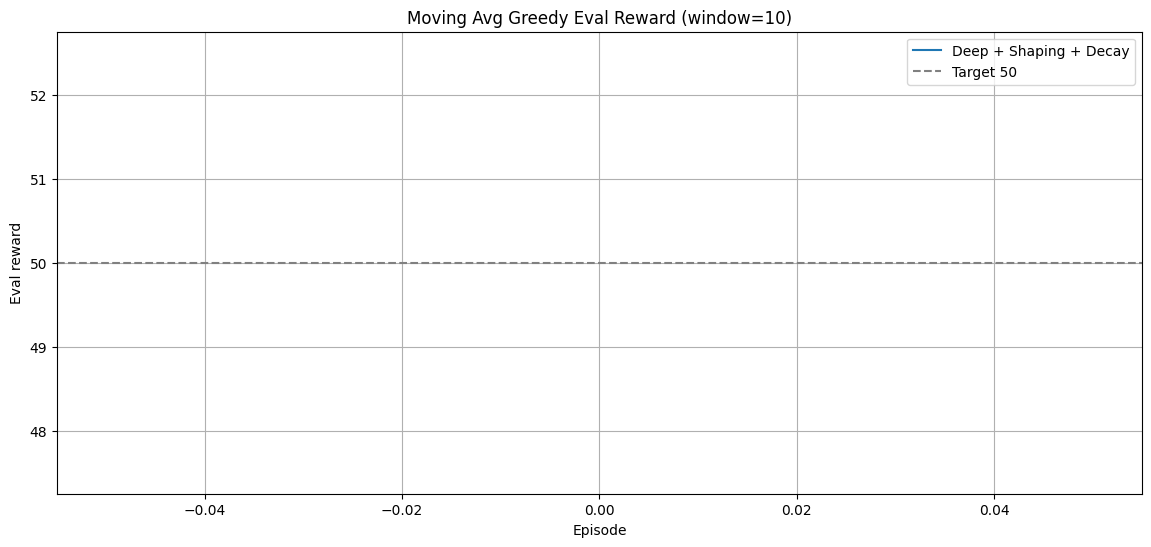

In [13]:
# ========== GRAFICO 4: Moving Average Greedy Eval ==========
window = 10
plt.figure(figsize=(14, 6))
for df in dataframes:
    if "evaluation_reward_greedy" in df.columns:
        evals = df["evaluation_reward_greedy"].replace(0, np.nan).dropna()
        ma = evals.rolling(window=window).mean()
        episodes = df[df["evaluation_reward_greedy"] > 0]["episode"]
        plt.plot(episodes, ma, label=df["run_label"].iloc[0])
plt.axhline(50, color='grey', linestyle='--', label="Target 50")
plt.title(f"Moving Avg Greedy Eval Reward (window={window})")
plt.xlabel("Episode")
plt.ylabel("Eval reward")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Overcooked PPO - Live CSV Monitoring

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import clear_output

# === Imposta l'intervallo di refresh (in secondi) ===
refresh_time = 30  # puoi cambiare (es. 10 per aggiornamento rapido)

# === Loop di monitoraggio live ===
while True:
    clear_output(wait=True)
    try:
        df = pd.read_csv(log_path)
        if df.shape[0] == 0:
            print("Aspetto dati nel CSV...")
            time.sleep(refresh_time)
            continue

        plt.figure(figsize=(12, 5))
        plt.plot(df["episode"], df["total_reward"], label="Total Reward")
        if "moving_avg_train_reward" in df.columns:
            plt.plot(df["episode"], df["moving_avg_train_reward"], label="Moving Avg (100)")
        if "evaluation_reward_greedy" in df.columns:
            evals = df[df["evaluation_reward_greedy"] > 0]
            plt.plot(evals["episode"], evals["evaluation_reward_greedy"], "o", label="Greedy Eval")
        plt.xlabel("Episode")
        plt.ylabel("Reward")
        plt.title("Training Progress (LIVE)")
        plt.legend()
        plt.grid(True)
        plt.show()
        print(f"Ultimo episodio: {df['episode'].iloc[-1]}, Total reward: {df['total_reward'].iloc[-1]:.2f}")
        print("Premi Interrompi/Stop quando vuoi fermare il monitoraggio live.")
    except Exception as e:
        print(f"Attesa dati nel log... {e}")
    time.sleep(refresh_time)